In [82]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,root_mean_squared_error,r2_score
import pickle

In [58]:
#read dataset
df=pd.read_csv('height_weight_data.csv')

In [59]:
df

,Height,Weight
0,1.47,52.21
1,1.50,53.12
2,1.52,54.48
3,1.55,55.84
4,1.57,57.20
5,1.60,58.57
6,1.63,59.93
7,1.65,61.29
8,1.68,63.11
9,1.70,64.47


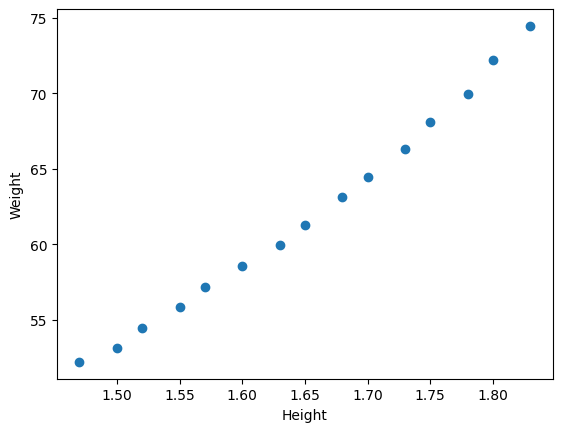

In [60]:
plt.scatter(x=df['Height'],y=df['Weight'])
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

In [61]:
x=df[['Height']]
y=df['Weight']

In [62]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=42)


In [63]:
x_test.shape

(5, 1)

In [64]:
x_train.shape

(10, 1)

In [65]:
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)

In [66]:
x_test_scaled=scaler.transform(x_test)

In [67]:
#fit the model
model=LinearRegression()

In [68]:
model.fit(x_train_scaled,y_train)

LinearRegression()

In [69]:
y_pred=model.predict(x_test_scaled)

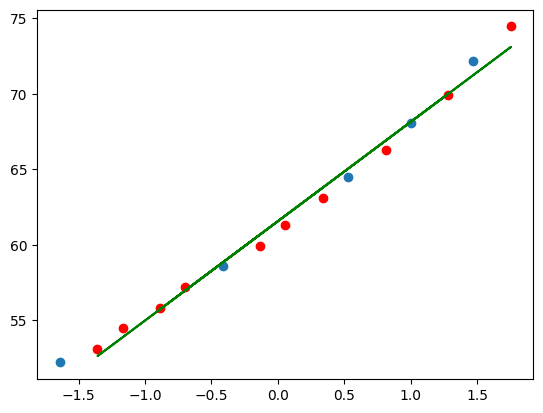

In [70]:
#scaler plot
plt.scatter(x_train_scaled,y_train,color='red')
plt.scatter(x_test_scaled,y_test)
plt.plot(x_train_scaled,model.predict(x_train_scaled),color='green')
plt.show()

In [71]:
#check accuracy
mse=mean_absolute_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=root_mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print(mse)
print(mae)
print(rmse)
print(r2)

0.6513870508715783
0.6513870508715783
0.8204242484843938
0.9864632324720193


In [72]:
#adjusted r2 score
ad_r2=1-(1-r2)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
ad_r2

0.981950976629359

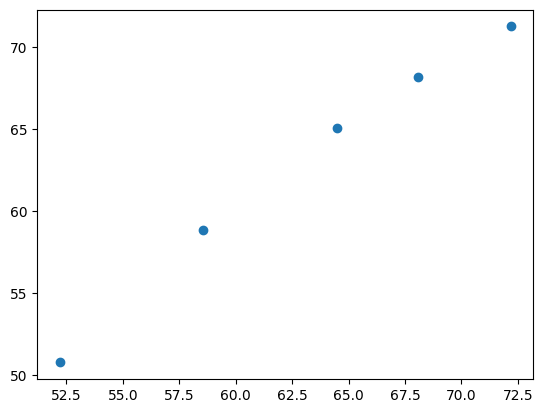

In [73]:
plt.scatter(y_test,y_pred)

C:\Users\pk\AppData\Local\Temp\ipykernel_7684\2306686289.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residual,kde=True)


<Axes: xlabel='Weight', ylabel='Density'>

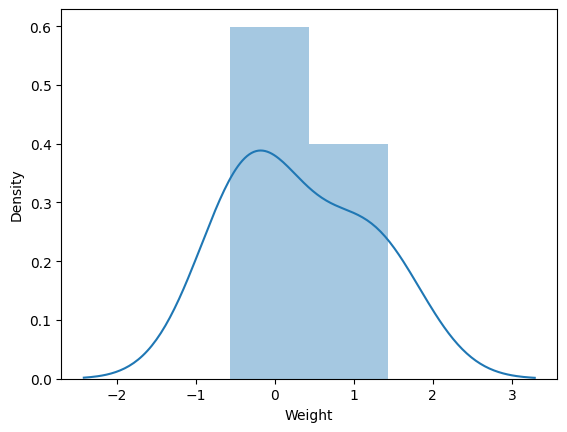

In [74]:
residual=y_test-y_pred
sns.distplot(residual,kde=True)

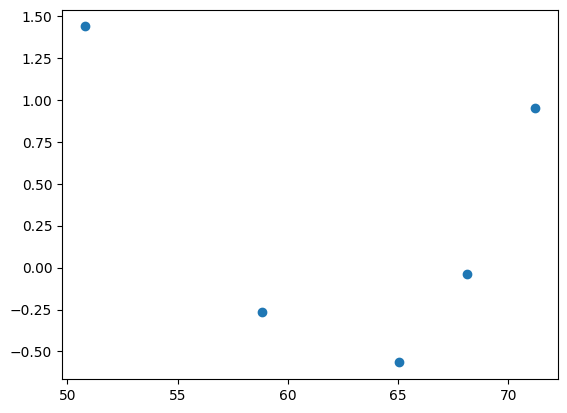

In [75]:
plt.scatter(y_pred,residual)

In [76]:
scaled_new=scaler.transform([[1.4]])

C:\Users\pk\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [80]:
model.predict([scaled_new[0]])

array([46.43152793])

In [88]:
#pickling the project
with open('data.pkl','wb') as file:
    pickle.dump(model,file)

In [89]:
with open('data.pkl','rb') as file:
    loaded_file=pickle.load(file)
print(loaded_file)

LinearRegression()


In [90]:
with open('scaler.pkl','wb') as file:
    pickle.dump(scaler,file)
with open('scaler.pkl','rb') as file:
    loaded_file=pickle.load(file)
print(loaded_file)

StandardScaler()
